In [1]:
#importing libraries we will use
import numpy as np
import wget
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
#download data to working directory
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv


Saved under housing (1).csv


In [3]:
#loading the dataset and previewing
df=pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


###EDA

Look at the median_house_value variable. Does it have a long tail?

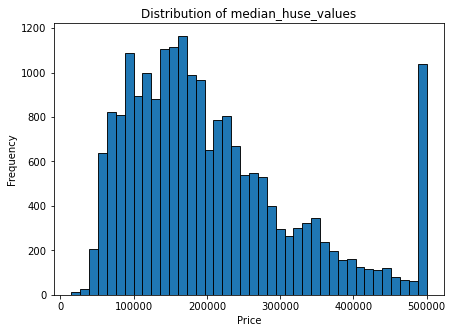

In [4]:
plt.figure(figsize=(7, 5))

sns.histplot(df.median_house_value, bins=40, alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of median_huse_values')

plt.show()

ans:Yes, we do  have a long tail

#### Question 1
Find a feature with missing values. How many missing values does it have?

In [5]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

ans: total_bedrooms, missing values=207

#### Question 2
What's the median (50% percentile) for variable 'population'?

In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


ans: 1166

##### Split the data

- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('median_house_value') is not in your dataframe.
- Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [7]:
np.random.seed(9)
n=len(df) #(number of rows)

train=int(0.6*n)
val=int(0.2*n)
test=int(0.2*n)

idx=np.arange(n)
np.random.shuffle(idx)

#shuffle table
df_shuffled = df.iloc[idx]

#partition
df_train = df_shuffled.iloc[:train].copy()
df_val = df_shuffled.iloc[train:train+val].copy()
df_test = df_shuffled.iloc[train+val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

#log transformation
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


### Question 3
We need to deal with missing values for the column from Q1.
We have two options: fill it with 0 or with the mean of this variable.
Try both options. For each, train a linear regression model without regularization using the code from the lessons.
For computing the mean, use the training only!
Use the validation dataset to evaluate the models and compare the RMSE of each option.
Round the RMSE scores to 2 decimal digits using round(score, 2)
Which option gives better RMSE?

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
def train_linear_regression(X,y):
    ones=np.ones(X.shape[0])
    X=np.column_stack([ones,X])
    XTX=X.T.dot(X)
    XTX_inv=np.linalg.inv(XTX)
    w=XTX_inv.dot(X.T).dot(y)
    return w[0],w[1:]

In [10]:
base=['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']
def prepare_X(df,fill_value):
    df_num = df[base]
    df_num = df_num.fillna(fill_value)
    X = df_num.values
    return X

#with zero fill
X_train_zero = prepare_X(df_train,0)
w_0, w = train_linear_regression(X_train_zero, y_train)


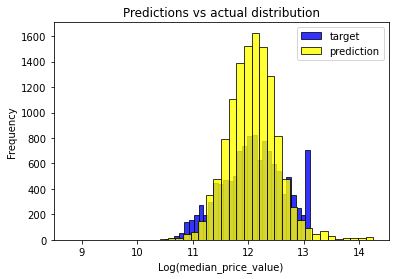

In [11]:
#plot for measuring descrepancy
y_pred_zero_fill = w_0 + X_train_zero.dot(w)
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='blue', alpha=0.8, bins=40)
sns.histplot(y_pred_zero_fill, label='prediction', color='yellow', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_price_value)')
plt.title('Predictions vs actual distribution')

plt.show()


In [12]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)
round(rmse(y_train, y_pred_zero_fill),2)

0.34

In [13]:
#from validation set
X_val_zero_fill = prepare_X(df_val,0)
y_pred_val_zero = w_0 + X_val_zero_fill.dot(w)
round(rmse(y_val, y_pred_val_zero),2)

0.34

#### with median fillna

In [14]:
#with median fill
median_fill=df_train['total_bedrooms'].median()
X_train_median = prepare_X(df_train,median_fill)
w_0, w = train_linear_regression(X_train_median, y_train)

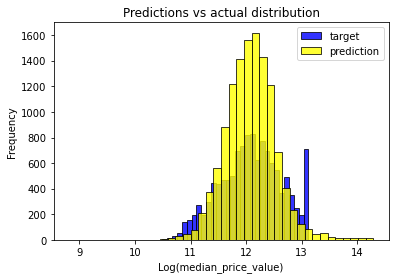

In [15]:
#plot for measuring descrepancy
y_pred_median_fill = w_0 + X_train_median.dot(w)
plt.figure(figsize=(6, 4))
sns.histplot(y_train, label='target', color='blue', alpha=0.8, bins=40)
sns.histplot(y_pred_median_fill, label='prediction', color='yellow', alpha=0.8, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(median_price_value)')
plt.title('Predictions vs actual distribution')

plt.show()

In [16]:
round(rmse(y_train, y_pred_median_fill),2)

0.34

In [17]:

round(rmse(y_train, y_pred_zero_fill),2)
#from validation set
X_val_median_fill = prepare_X(df_val,median_fill)
y_pred_val_median = w_0 + X_val_median_fill.dot(w)
round(rmse(y_val, y_pred_val_median),2)

0.34

ans:both fill techniques are equally good

In [49]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]
X_train = prepare_X(df_train,0)
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)

In [19]:
X_train = prepare_X(df_train,0)
X_val = prepare_X(df_val,0)

for r in [0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),2))

 1e-06 0.34
0.0001 0.34
 0.001 0.34
  0.01 0.34
   0.1 0.34
     1 0.34
     5 0.34
    10 0.35


ans:the answer is 0.000001

### Question 5

In [35]:
rmse_scores=[]
for sd in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(sd)
    n=len(df) #(number of rows)

    train=int(0.6*n)
    val=int(0.2*n)
    test=int(0.2*n)

    idx=np.arange(n)
    np.random.shuffle(idx)

    #shuffle table
    df_shuffled = df.iloc[idx]

    #partition
    df_train = df_shuffled.iloc[:train].copy()
    df_val = df_shuffled.iloc[train:train+val].copy()
    df_test = df_shuffled.iloc[train+val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values

    #log transformation
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    
    #with zero fill
    X_train_zero = prepare_X(df_train,0)
    w_0, w = train_linear_regression(X_train_zero, y_train)
    
    X_val_zero_fill = prepare_X(df_val,0)
    y_pred_val_zero = w_0 + X_val_zero_fill.dot(w)
    temp=rmse(y_val, y_pred_val_zero)
    rmse_scores.append(temp)
    
standard_dev=round(np.std(rmse_scores),3)
print("rmse_scores_std",standard_dev)
    

rmse_scores_std 0.004


ans:005

### Question 6

In [52]:
np.random.seed(sd)
n=len(df) #(number of rows)

train=int(0.6*n)
val=int(0.2*n)
test=int(0.2*n)

idx=np.arange(n)
np.random.shuffle(idx)

#shuffle table
df_shuffled = df.iloc[idx]

   
df_train = df_shuffled.iloc[:train].copy()
df_val = df_shuffled.iloc[train:train+val].copy()
df_test = df_shuffled.iloc[train+val:].copy()

print(n,len(df_train),len(df_val),len(df_test))

frames = [df_train, df_val]
df_train_val = pd.concat(frames)

df_train_val = df_train_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train_val_orig = df_train_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train_val = np.log1p(df_train_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_test['median_house_value']

    


20640 12384 4128 4128


In [53]:
X_null_train_val = prepare_X(df_train_val,0)
w_0_train_val, w_train_val = train_linear_regression_reg(X_null_train_val, y_train_val, r=0.001)

X_null_test = prepare_X(df_test,0)
y_null_pred_test = w_0_train_val + X_null_test.dot(w_train_val)


    

In [54]:
np.round(rmse(y_test, y_null_pred_test),2)

0.35

ans: 0.35